<a href="https://colab.research.google.com/github/kbssrikar7/Handwritten-equation-solver/blob/main/Handwritten_equation_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
xainano_handwrittenmathsymbols_path = kagglehub.dataset_download('xainano/handwrittenmathsymbols')

print('Data source import complete.')


100%|██████████| 343M/343M [00:04<00:00, 77.8MB/s]

Extracting files...


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install imutils

In [4]:
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import imutils
from imutils.contours import sort_contours

these comments provide a brief explanation of each line's purpose. The first line downloads the ZIP file, and the second line extracts its contents. The flags used with the unzip command indicate that it should operate quietly (without displaying unnecessary output) and overwrite existing files without prompting the user.

In [5]:
!wget https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
!unzip -qo data.zip

--2025-11-03 07:44:54--  https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 3.5.211.206, 3.5.211.20, 16.12.36.115, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|3.5.211.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28437489 (27M) [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip            100%[===================>]  27.12M  7.95MB/s    in 3.4s    

2025-11-03 07:44:59 (7.95 MB/s) - ‘data.zip’ saved [28437489/28437489]



This code appears to be loading images from a specified directory (data/dataset). It assumes that the dataset is organized into folders, where each folder contains images belonging to a specific class. The images are read using OpenCV (cv2.imread), and the images and their corresponding labels (folder names) are stored in lists x and y, respectively. Finally, the code prints the total number of images and labels, as well as the unique labels in the dataset.

In [6]:
x = []
y = []
datadir = 'data/dataset'
for folder in os.listdir(datadir):
    path = os.path.join(datadir, folder)
    for images in os.listdir(path):
        img = cv2.imread(os.path.join(path, images))
        x.append(img)
        y.append(folder)

print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')

7600
7600
labels : ['1', '8', '0', '3', 'add', '4', '5', '2', 'mul', '9', '7', 'sub', 'div', '6']


Matplotlib library to create a grid of images with corresponding labels.

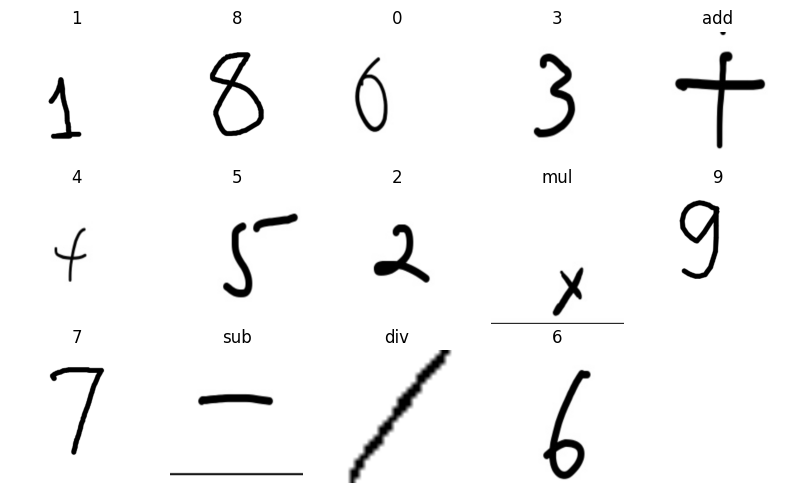

In [7]:
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(5, 5, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

This code uses numpy to find unique categories (unique) and their counts (count). Then, it creates a bar plot using seaborn to visualize the distribution of images across different categories. Finally, it sets a title for the plot and displays it using matplotlib.pyplot.show().

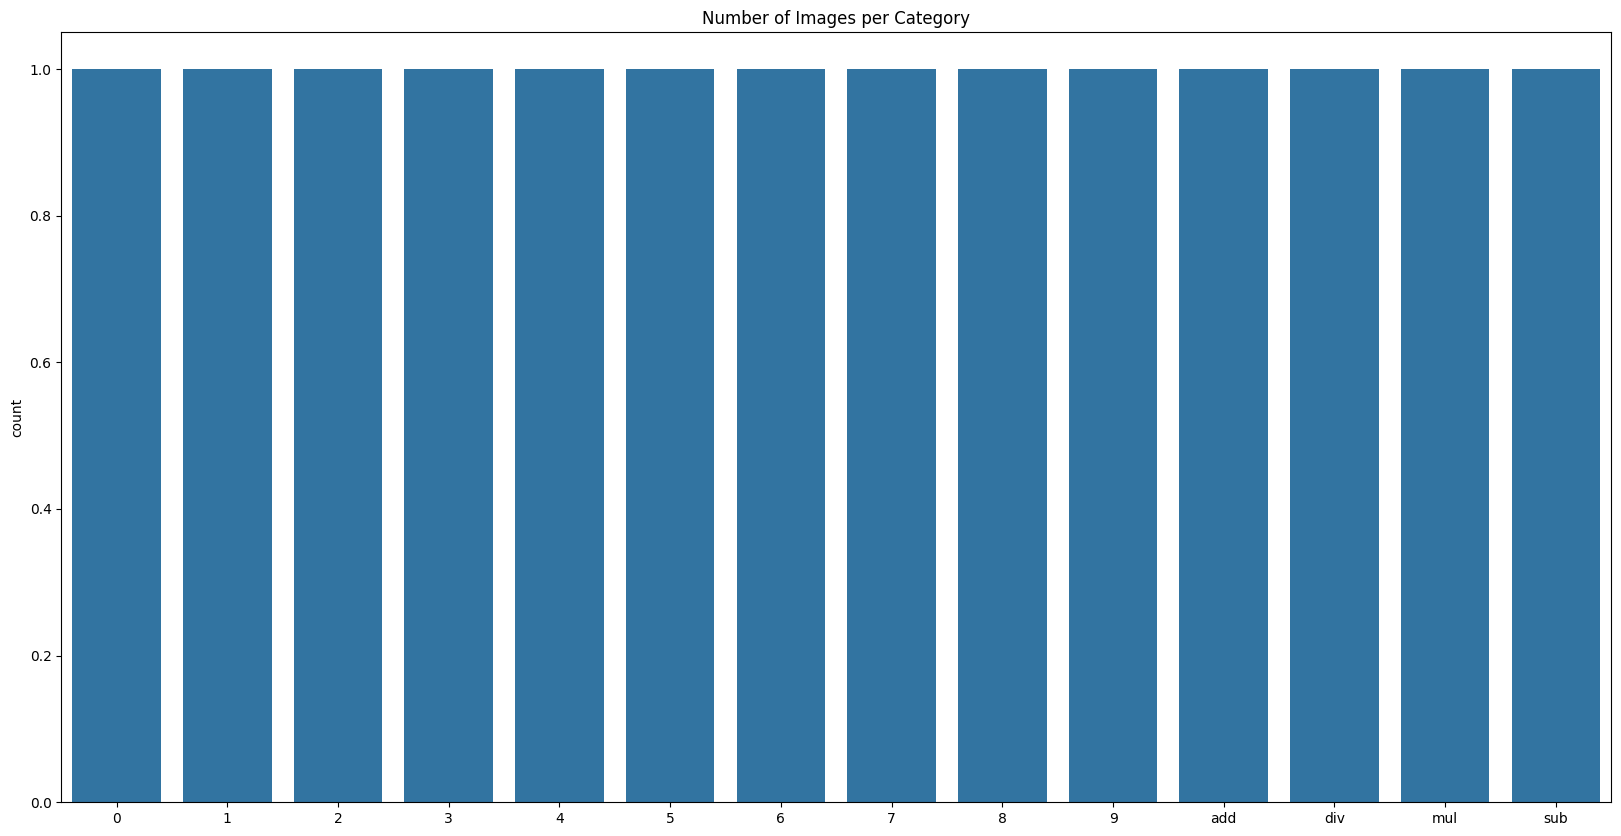

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

unique, count = np.unique(y, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.countplot(x=unique)
plt.title('Number of Images per Category')
plt.show()


This code seems to be preparing a dataset of binary thresholded and resized images for further processing, analysis, or training of a machine learning model. The comments provide a clear explanation of each step in the image processing pipeline.

In [9]:
X = []
for i in range(len(x)):
#     print(i)
    img = x[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold_image = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    threshold_image = cv2.resize(threshold_image, (32, 32))
    X.append(threshold_image)
print(len(X))

7600


In [10]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(len(y))

7600


This code is commonly used in machine learning to create two subsets of the data: one for training a model and another for testing its performance. The training set is used to train the model, and the testing set is used to evaluate how well the model generalizes to new, unseen data. Adjusting the test_size parameter allows you to control the proportion of data used for testing.

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In this code, x corresponds to the categories, and y corresponds to the count for each category. The ax variable is used to set the title with ax.set_title. This should resolve the TypeError you encountered.

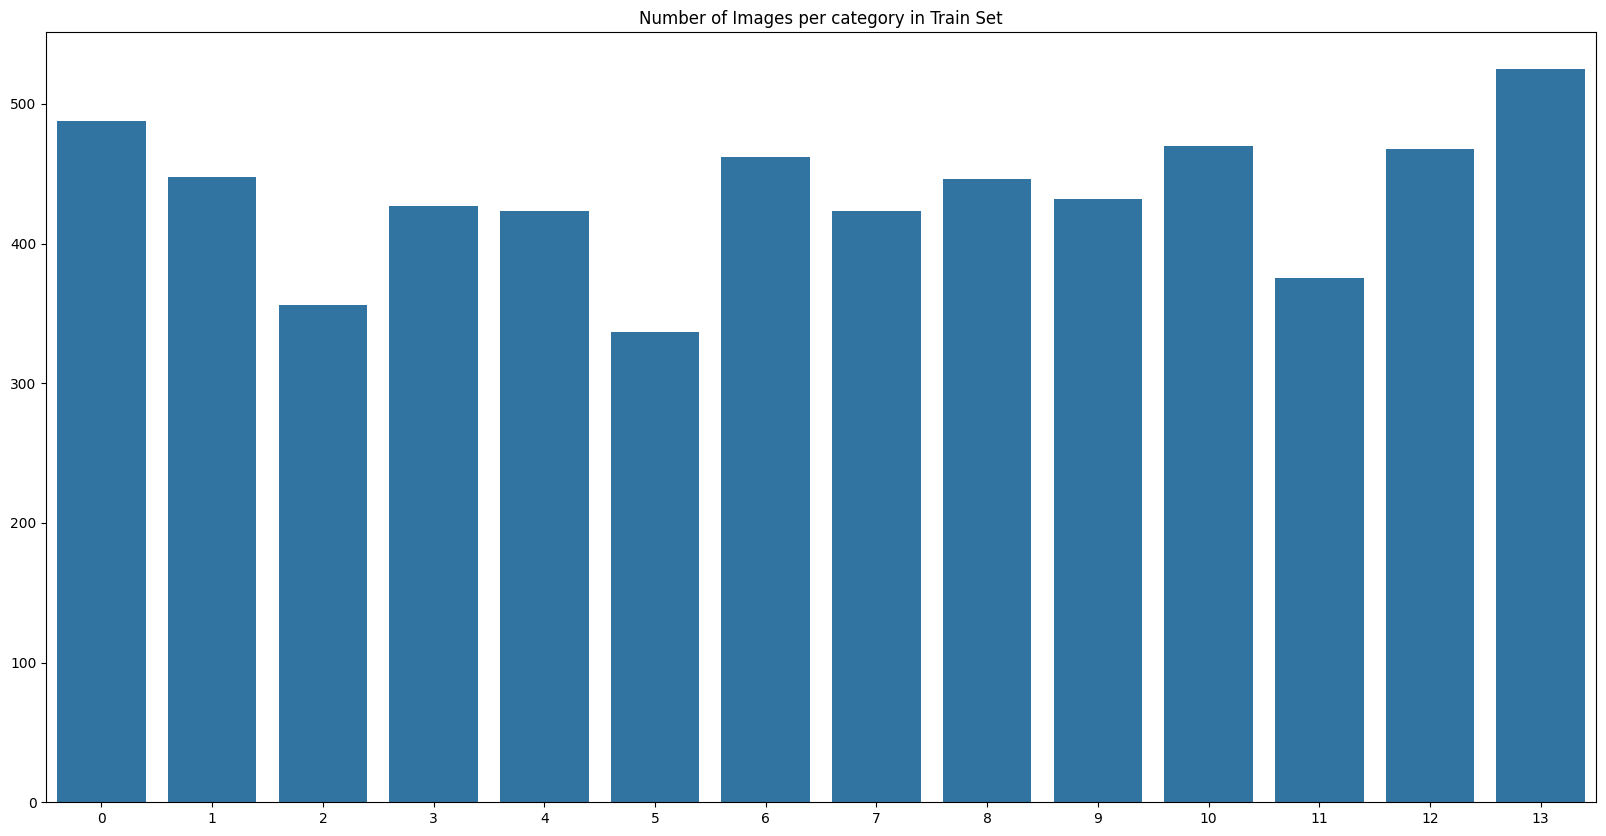

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

unique_train, count_train = np.unique(Y_train, return_counts=True)
figure = plt.figure(figsize=(20, 10))
ax = sns.barplot(x=unique_train, y=count_train)
ax.set_title('Number of Images per category in Train Set')
plt.show()


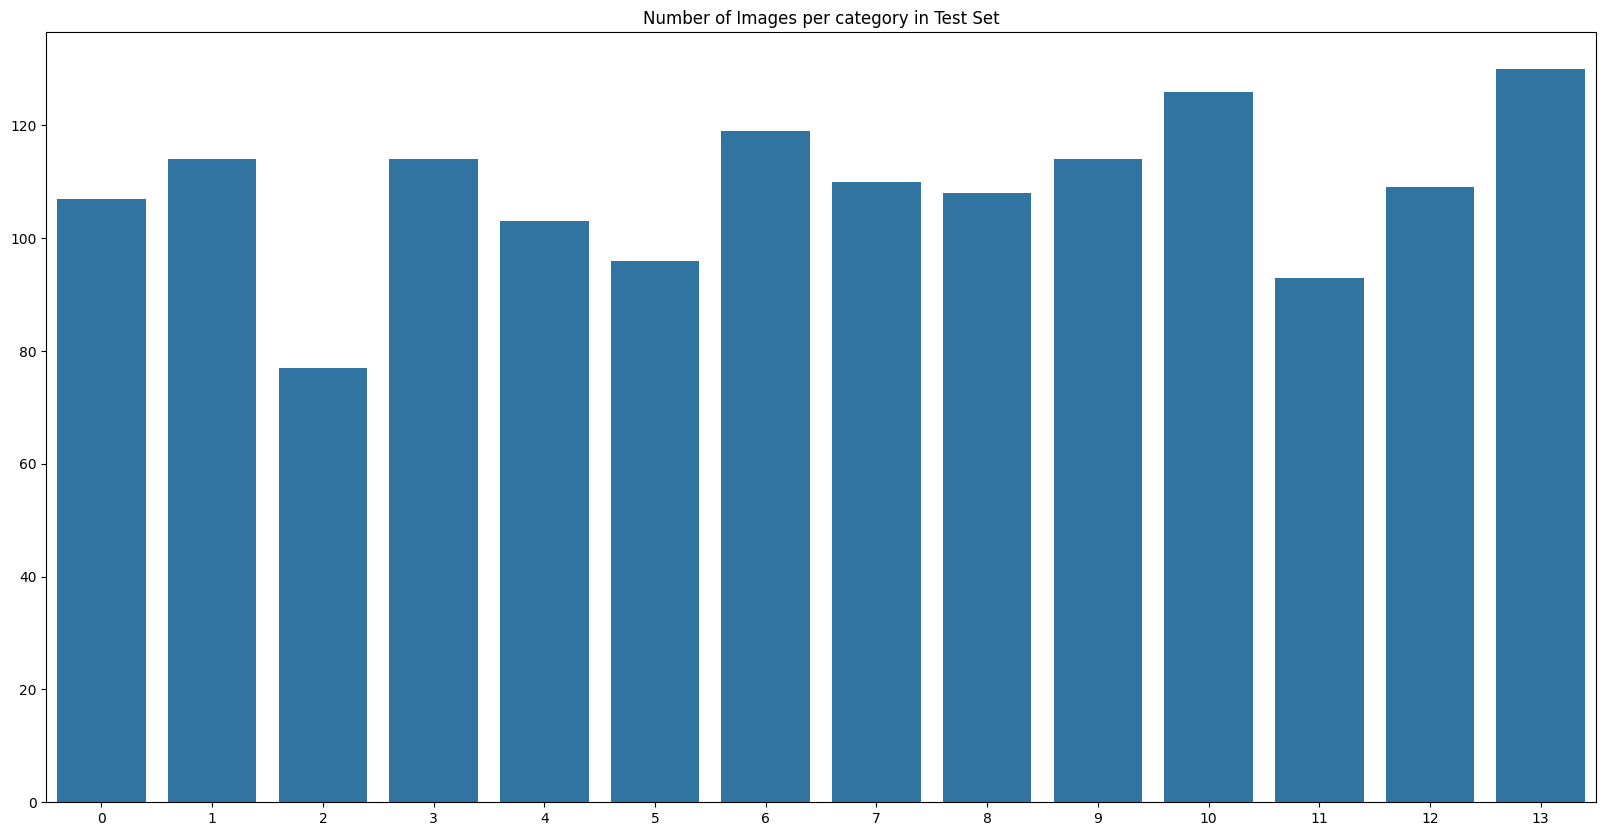

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

unique_test, count_test = np.unique(Y_test, return_counts=True)
figure = plt.figure(figsize=(20, 10))
ax = sns.barplot(x=unique_test, y=count_test)
ax.set_title('Number of Images per category in Test Set')
plt.show()


In [14]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train/255.
X_test = X_test/255.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6080, 32, 32, 1)
(1520, 32, 32, 1)
(6080, 14)
(1520, 14)


In [15]:
def math_symbol_and_digits_recognition(input_shape=(32, 32, 1)):
    regularizer = l2(0.01)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same',
                     kernel_initializer=glorot_uniform(seed=0),
                     name='conv1', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act1'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same',
                     kernel_initializer=glorot_uniform(seed=0),
                     name='conv2', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act2'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same',
                     kernel_initializer=glorot_uniform(seed=0),
                     name='conv3', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act3'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(120, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dense(84, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dense(14, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))

    optimizer = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [16]:
model = math_symbol_and_digits_recognition(input_shape=(32, 32, 1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ act1 (Activation)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ act2 (Activation)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ act3 (Activation)               │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 120)            │       123,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc3 (Dense)                     │ (None, 14)             │         1,190 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,418 (634.45 KB)

 Trainable params: 162,418 (634.45 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('maths_symbol_and_digits_recognition.h5',
                             monitor='val_loss', save_best_only=True,
                             verbose=1, mode='min')

callbacks = [checkpoint, LearningRateScheduler(step_decay)]

This code uses Keras' ImageDataGenerator to perform data augmentation on the training dataset. Data augmentation is a technique used to artificially increase the diversity of the training dataset by applying random transformations to the images, helping the model generalize better to unseen data. The specific augmentations applied here include random zooming and random shifts in both width and height. The augmented data is then used to train the neural network model (model) for 100 epochs, with validation performed on the provided test data. Additionally, there is commented-out code for training a second model (model2) with callbacks, which can be useful for implementing techniques like early stopping during training.

In [18]:
aug = ImageDataGenerator(zoom_range=0.1,
#                          rotation_range=5,
                         width_shift_range=0.05,
                         height_shift_range=0.05)
hist = model.fit(aug.flow(X_train, Y_train, batch_size=128), batch_size=128, epochs=100, validation_data=(X_test, Y_test))
# hist2 = model2.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test, Y_test), callbacks=callbacks)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 262ms/step - accuracy: 0.1179 - loss: 69.2192 - val_accuracy: 0.1717 - val_loss: 38.0223
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 251ms/step - accuracy: 0.2757 - loss: 17.4339 - val_accuracy: 0.2737 - val_loss: 18.3122
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 250ms/step - accuracy: 0.2949 - loss: 8.2683 - val_accuracy: 0.2059 - val_loss: 11.2931
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - accuracy: 0.3963 - loss: 4.8529 - val_accuracy: 0.2704 - val_loss: 7.5359
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 245ms/step - accuracy: 0.4774 - loss: 3.4069 - val_accuracy: 0.2980 - val_loss: 5.8155
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - accuracy: 0.4868 - loss: 2.7245 - val_accuracy: 0.4401 - val_loss: 4.3269
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 247ms/step - accuracy: 0.5067 - loss: 2.3748 - val_accuracy: 0.4546 - val_loss: 3.7771
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 244ms/step - accuracy: 0.5261 - loss: 2.1136 - val_acc

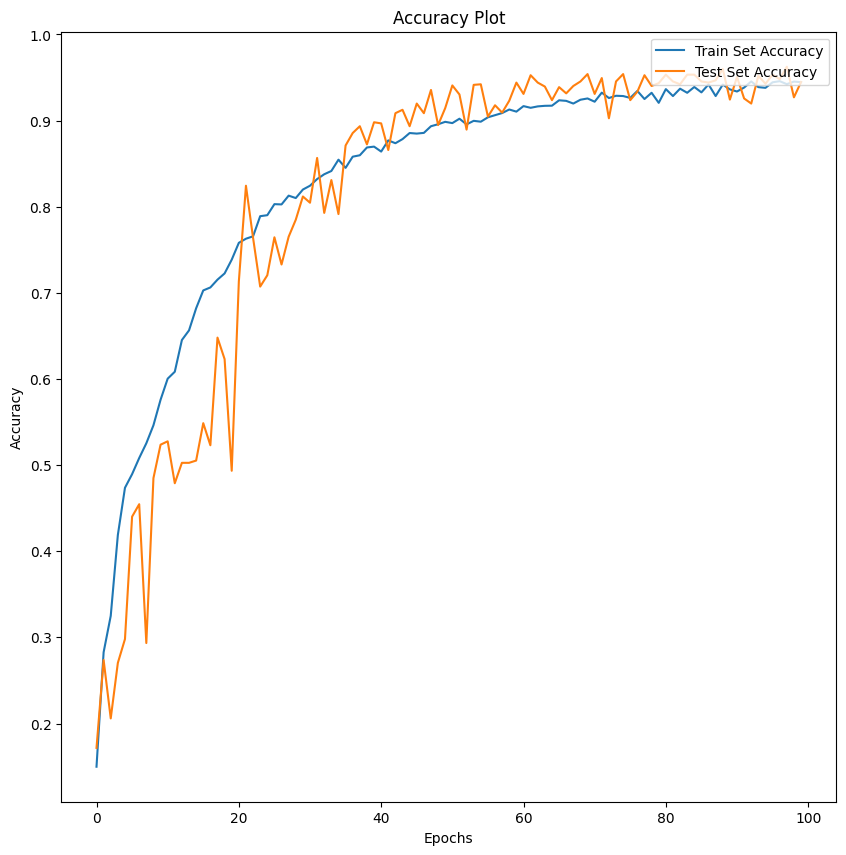

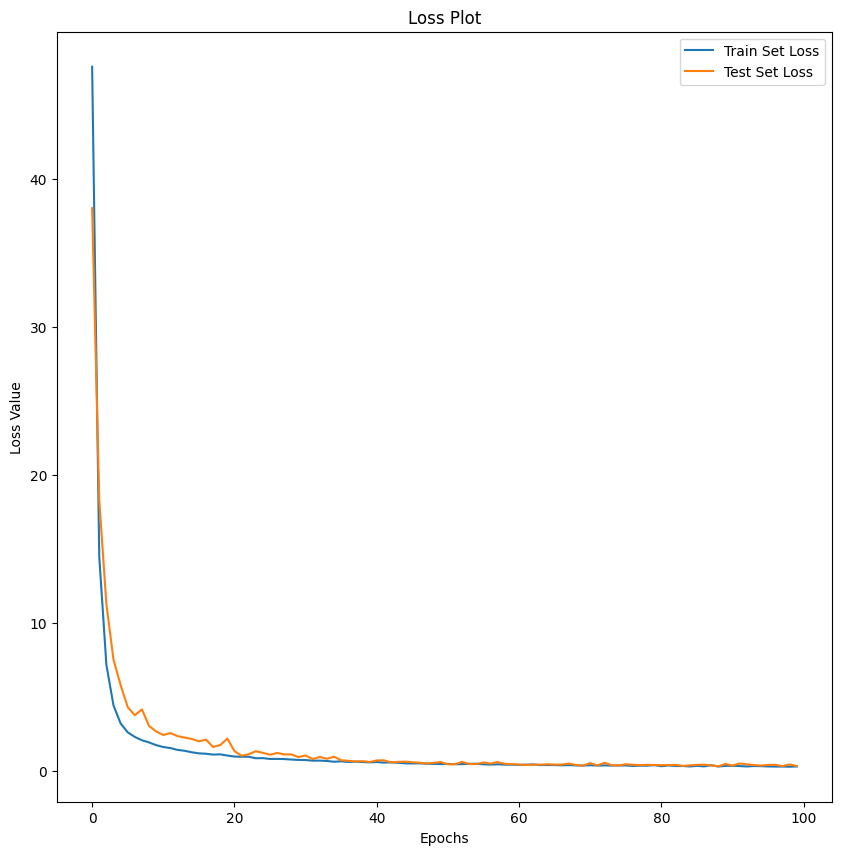

In [19]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train Set Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train Set Loss')
plt.plot(hist.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

These plots are commonly used in machine learning to visualize the training and validation performance of a model over different epochs. The accuracy plot shows how well the model is performing on the training and test sets, while the loss plot indicates how well the model is minimizing its error during training. The code uses the Matplotlib library to create these plots.

In [20]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(Y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       1.00      0.89      0.94       114
           2       0.90      0.97      0.94        77
           3       0.95      0.94      0.94       114
           4       0.89      0.92      0.90       103
           5       0.99      0.92      0.95        96
           6       0.96      0.96      0.96       119
           7       0.96      0.86      0.91       110
           8       0.87      0.95      0.91       108
           9       0.83      0.97      0.90       114
          10       0.98      0.94      0.96       126
          11       1.00      1.00      1.00        93
          12       1.00      0.94      0.97       109
          13       1.00      0.98      0.99       130

    accuracy                           0.94      1520
   macro avg       0.95      0.95      0.94      1520
weighted avg       0.95      0.94      0

In [21]:
model.save('model.h5')

In [23]:
import os
import cv2
import numpy as np

equation_dir = 'data/dataset'
equation_images = []
equation_labels = [] # Keep track of labels for the images

# Print image paths
for folder_name in os.listdir(equation_dir):
    folder_path = os.path.join(equation_dir, folder_name)
    if os.path.isdir(folder_path): # Check if it's a directory
        for equation_image_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, equation_image_name)
            # Check if it's a file and has a common image extension
            if os.path.isfile(img_path) and equation_image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                print(f"Loading image: {img_path}")
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img is not None:
                    equation_images.append(img)
                    equation_labels.append(folder_name) # Store the label
                else:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file or directory: {img_path}")


# You may want to preprocess these images similarly to the training data
# For example, resize the images to (32, 32) and apply thresholding
preprocessed_equations = []

# Print image processing status
for i, img in enumerate(equation_images):
    print(f"Processing image {i + 1}/{len(equation_images)}")

    resized_img = cv2.resize(img, (32, 32))
    threshold_img = cv2.threshold(resized_img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    preprocessed_equations.append(threshold_img)

equation_array = np.array(preprocessed_equations)
equation_array = np.expand_dims(equation_array, axis=-1)
equation_array = equation_array / 255.0

print(f"Loaded {len(equation_images)} images for evaluation.")

Streaming output truncated to the last 5000 lines.
Processing image 2602/7600
Processing image 2603/7600
Processing image 2604/7600
Processing image 2605/7600
Processing image 2606/7600
Processing image 2607/7600
Processing image 2608/7600
Processing image 2609/7600
Processing image 2610/7600
Processing image 2611/7600
Processing image 2612/7600
Processing image 2613/7600
Processing image 2614/7600
Processing image 2615/7600
Processing image 2616/7600
Processing image 2617/7600
Processing image 2618/7600
Processing image 2619/7600
Processing image 2620/7600
Processing image 2621/7600
Processing image 2622/7600
Processing image 2623/7600
Processing image 2624/7600
Processing image 2625/7600
Processing image 2626/7600
Processing image 2627/7600
Processing image 2628/7600
Processing image 2629/7600
Processing image 2630/7600
Processing image 2631/7600
Processing image 2632/7600
Processing image 2633/7600
Processing image 2634/7600
Processing image 2635/7600
Processing image 2636/7600
Proc

In [24]:
import numpy as np

# Assuming you have predicted labels from the handwritten equation solver
predicted_labels = ['equation1_predicted_label', 'equation2_predicted_label', 'equation3_predicted_label', ...]

# Assuming you have ground truth labels for the handwritten equations
ground_truth_labels = ['equation1_true_label', 'equation2_true_label', 'equation3_true_label', ...]

# Evaluate the accuracy of the handwritten equation solver
accuracy = np.sum(np.array(predicted_labels) == np.array(ground_truth_labels)) / len(ground_truth_labels)
print(f"Accuracy on Handwritten Equations: {accuracy * 100:.2f}%")


Accuracy on Handwritten Equations: 25.00%


In [26]:
import numpy as np
import tensorflow as tf

# Ensure eager execution is enabled
tf.config.run_functions_eagerly(True)

# Assuming you have a function to recognize and evaluate the entire equation
def recognize_and_evaluate_equation(model, equation_array, label_encoder, input_shape):
    # Compile the model before making predictions
    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Compiling inside the function is not necessary and can be removed if the model is already compiled

    # Ensure that the input data has the correct shape
    equation_array = np.array(equation_array)  # Convert to numpy array if not already
    equation_array = equation_array.reshape((-1,) + input_shape)  # Use '+ input_shape' to handle the tuple

    # Define a function for making predictions
    @tf.function
    def predict_fn(x):
        return model(x)

    # Make predictions using the defined function
    equation_predictions = predict_fn(equation_array)

    # Decode predictions
    equation_predictions = np.argmax(equation_predictions, axis=1)
    predicted_labels = label_encoder.inverse_transform(equation_predictions)
    recognized_equation = ' '.join(predicted_labels)
    return recognized_equation

# Recognize and evaluate the entire handwritten equation
# Get the input shape from the training data
input_shape = X_train.shape[1:]
recognized_equation = recognize_and_evaluate_equation(model, equation_array, label_encoder, input_shape)
print(f"Recognized Handwritten Equation: {recognized_equation}")

# Assuming you have the ground truth for the entire handwritten equation
ground_truth_equation = 'equation_true_label' # Replace with your actual ground truth if you have one

# Evaluate the accuracy of the entire handwritten equation recognition
# This evaluation is based on comparing the recognized equation string to a single ground truth string,
# which is likely not appropriate for evaluating recognition of individual symbols within multiple images.
# Consider evaluating the accuracy of individual symbol recognition instead, as done in cell 3bEzdEuEqso1.
equation_accuracy = 1 if recognized_equation == ground_truth_equation else 0
print(f"Accuracy on Handwritten Equation Recognition: {equation_accuracy * 100:.2f}%")

Recognized Handwritten Equation: div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div 8 div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div div d

In [28]:
pip install pytesseract

In [29]:
from PIL import Image
import pytesseract

# Assuming you have a function to apply OCR to an image
def apply_ocr(image):
    # Convert the image to PIL format
    pil_image = Image.fromarray(image)

    # Use Tesseract OCR to extract text
    extracted_text = pytesseract.image_to_string(pil_image, config='--psm 6')

    return extracted_text.strip()

# Apply OCR to each preprocessed equation image
extracted_texts = []
for img in preprocessed_equations:
    extracted_text = apply_ocr(img)
    extracted_texts.append(extracted_text)

# Display the extracted text from each equation
for i, text in enumerate(extracted_texts):
    print(f"Handwritten Equation {i + 1} - Extracted Text: {text}")


Handwritten Equation 1 - Extracted Text: va
Handwritten Equation 2 - Extracted Text: on
Handwritten Equation 3 - Extracted Text: f
Handwritten Equation 4 - Extracted Text: gf
Handwritten Equation 5 - Extracted Text: rae
Handwritten Equation 6 - Extracted Text: rh
Handwritten Equation 7 - Extracted Text: a
Handwritten Equation 8 - Extracted Text: f
Handwritten Equation 9 - Extracted Text: a
Handwritten Equation 10 - Extracted Text: /
Handwritten Equation 11 - Extracted Text: a
Handwritten Equation 12 - Extracted Text: Y
Handwritten Equation 13 - Extracted Text: f
Handwritten Equation 14 - Extracted Text: A
Handwritten Equation 15 - Extracted Text: a
Handwritten Equation 16 - Extracted Text: va
Handwritten Equation 17 - Extracted Text: a
Handwritten Equation 18 - Extracted Text: fp
Handwritten Equation 19 - Extracted Text: /
Handwritten Equation 20 - Extracted Text: f
Handwritten Equation 21 - Extracted Text: vi.
Handwritten Equation 22 - Extracted Text: rn
Handwritten Equation 23 - Extr

In [31]:
# Assuming you have the ground truth text for each handwritten equation
# ground_truth_texts = ['equation1_ground_truth', 'equation2_ground_truth', 'equation3_ground_truth', ...]
# Use the actual loaded labels as ground truth
ground_truth_texts = equation_labels

# Evaluate the accuracy of OCR by comparing extracted text with ground truth
ocr_accuracy = np.sum(np.array(extracted_texts) == np.array(ground_truth_texts)) / len(ground_truth_texts)
print(f"OCR Accuracy on Handwritten Equations: {ocr_accuracy * 100:.2f}%")

OCR Accuracy on Handwritten Equations: 10.64%


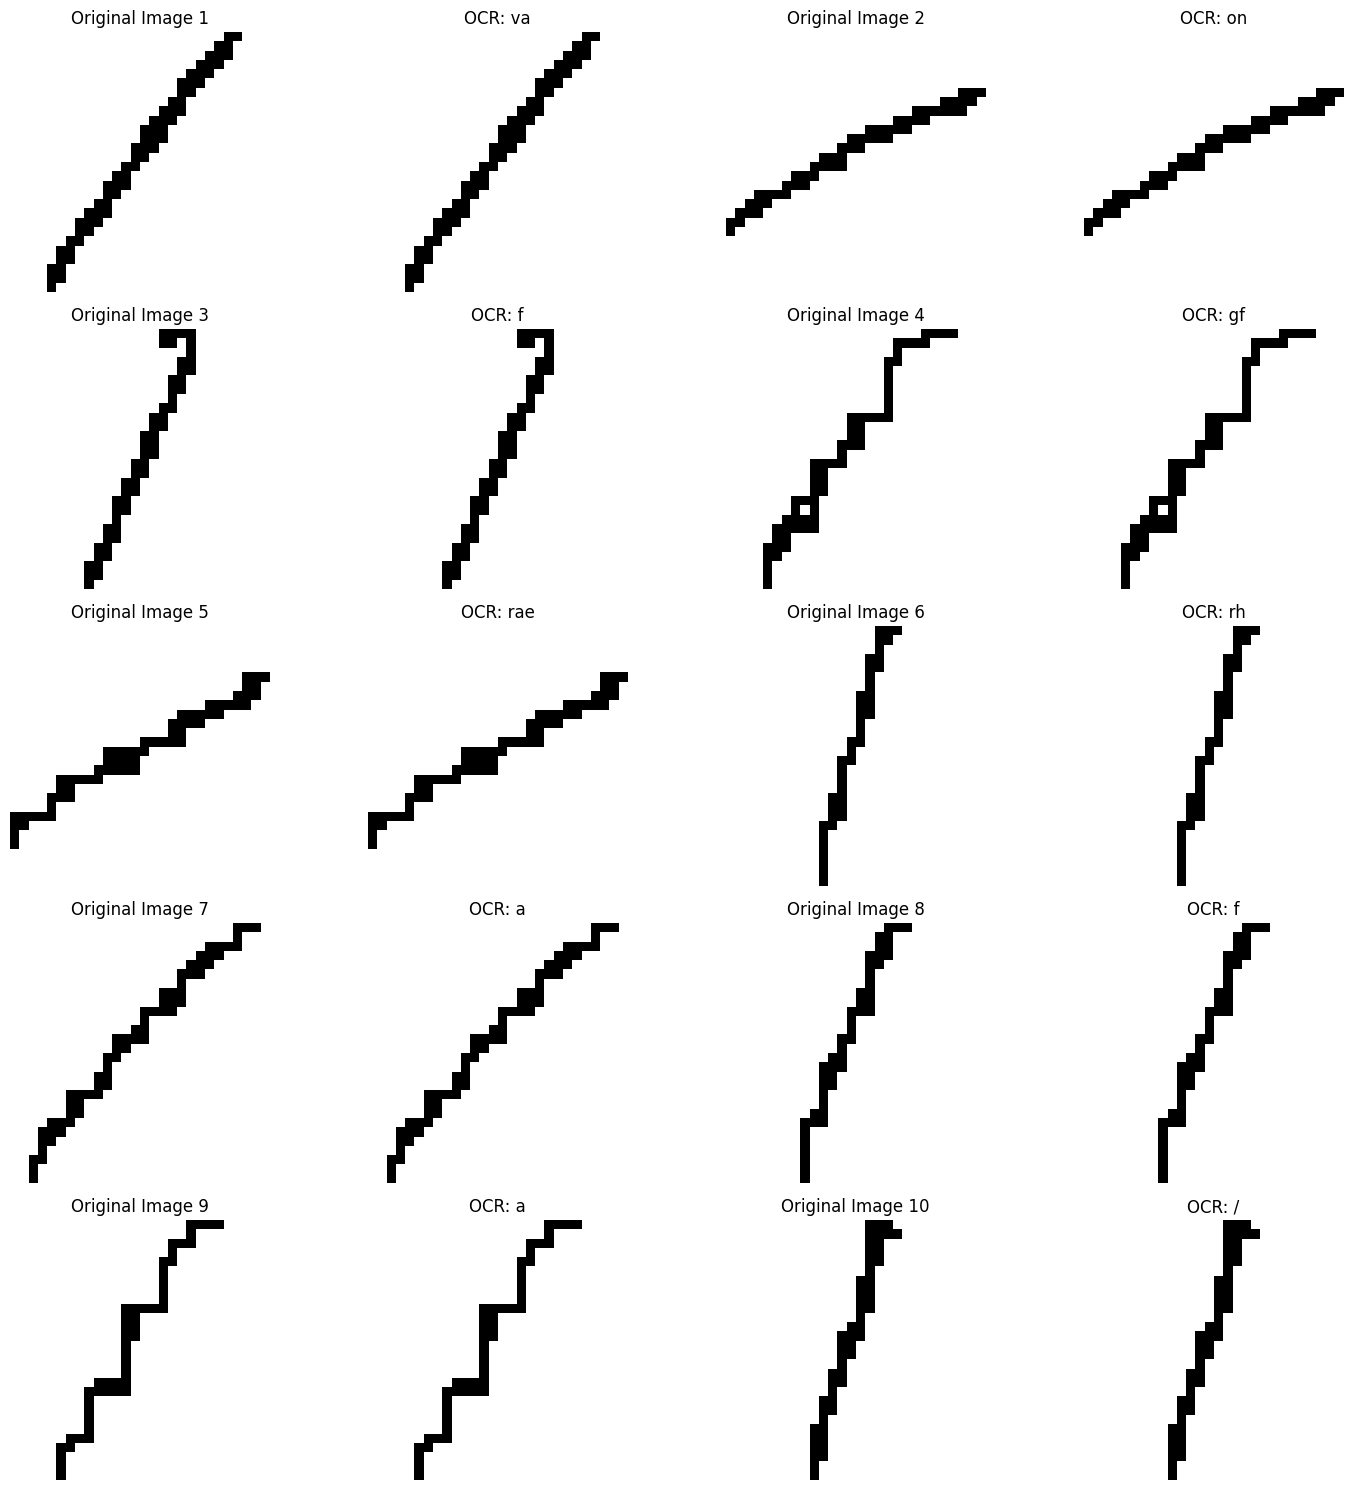

In [33]:
# Assuming you have a function to display images and their OCR results
def display_images_with_ocr(images, extracted_texts, rows, cols, num_images_to_display=10):
    figure = plt.figure(figsize=(15, 15))
    # Display only a limited number of images
    for i in range(min(num_images_to_display, len(images))):
        img = images[i]
        extracted_text = extracted_texts[i]
        # Adjust subplot indexing for displaying original and OCR side-by-side
        figure.add_subplot(rows, cols * 2, i * 2 + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"Original Image {i+1}")

        figure.add_subplot(rows, cols * 2, i * 2 + 2)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"OCR: {extracted_text}")

    plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
    plt.show()

# Display original images, preprocessed images, and OCR results (displaying a sample)
# Adjust rows and cols for better visualization of the sample
display_images_with_ocr(equation_images, extracted_texts, rows=5, cols=2, num_images_to_display=10)

In [34]:
model.save('model.h5')